# **NBA Scoring Evolution Analysis**
## Introduction
It is well known that NBA players are constantly improving. The question begs, how rapidly are they improving? What exactly is causing the NBA's rapidly improving offensive efficiency?
This is a short project where I answer those two questions. This project utilizes Pandas and Numpy to view, clean and manipulate the data, as well as matplotlib and seaborn to visualize results.  

The dataset I used was scraped from the NBA's official stats page: [https://www.nba.com/stats/leaders](url). The scraping process is documented in the ```stats scraping.ipynb``` file.
I also saved the full dataset as an Excel file, ```nba_player_data.xlsx```. 
This dataset includes the total stats for each player from the 2012-13 season through the 2021-22 season, with individual stats recorded seperately for each season.

## Cleaning the Data

In [175]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_excel('nba_player_data.xlsx')

In [176]:
data.sample(10)

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
5194,2019-20,Regular%20Season,1627751,249,Jakob Poeltl,1610612759,SAS,66,1171,166,...,375,116,37,95,54,126,372,795,2.15,0.69
5077,2019-20,Regular%20Season,1628989,131,Kevin Huerter,1610612737,ATL,56,1760,252,...,228,213,51,27,87,139,684,747,2.45,0.59
4116,2017-18,Playoffs,1627748,121,Thon Maker,1610612749,MIL,6,130,11,...,23,5,2,11,4,17,33,51,1.25,0.50
3653,2017-18,Regular%20Season,200794,197,Paul Millsap,1610612743,DEN,38,1143,202,...,245,105,39,44,73,99,555,633,1.44,0.53
3361,2016-17,Playoffs,1626150,123,Andrew Harrison,1610612763,MEM,6,119,13,...,11,13,3,1,3,14,39,47,4.33,1.00
5536,2019-20,Playoffs,1627863,62,Danuel House Jr.,1610612745,HOU,9,279,37,...,52,13,8,0,7,22,103,118,1.86,1.14
3515,2017-18,Regular%20Season,201567,62,Kevin Love,1610612739,CLE,59,1651,334,...,546,103,43,24,90,120,1039,1238,1.14,0.48
381,2012-13,Regular%20Season,2248,382,Earl Watson,1610612762,UTA,48,829,37,...,87,190,40,8,69,94,96,261,2.75,0.58
4514,2018-19,Regular%20Season,1628391,311,D.J. Wilson,1610612749,MIL,48,882,104,...,222,52,18,20,32,85,280,392,1.63,0.56
2352,2015-16,Regular%20Season,204020,290,Tyler Johnson,1610612748,MIA,36,863,118,...,109,79,24,14,47,66,314,355,1.68,0.51


In [177]:
data.shape

(7293, 30)

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7293 entries, 0 to 7292
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         7293 non-null   object 
 1   Season_type  7293 non-null   object 
 2   PLAYER_ID    7293 non-null   int64  
 3   RANK         7293 non-null   int64  
 4   PLAYER       7293 non-null   object 
 5   TEAM_ID      7293 non-null   int64  
 6   TEAM         7293 non-null   object 
 7   GP           7293 non-null   int64  
 8   MIN          7293 non-null   int64  
 9   FGM          7293 non-null   int64  
 10  FGA          7293 non-null   int64  
 11  FG_PCT       7293 non-null   float64
 12  FG3M         7293 non-null   int64  
 13  FG3A         7293 non-null   int64  
 14  FG3_PCT      7293 non-null   float64
 15  FTM          7293 non-null   int64  
 16  FTA          7293 non-null   int64  
 17  FT_PCT       7293 non-null   float64
 18  OREB         7293 non-null   int64  
 19  DREB  

### **First Inspection**
Upon first inspection of the data, we can observe that it is already fairly clean. 
It seems there are no non-null values, and most, if not all, columns are of the correct type.
However, there are a couple of minor changes we can make to make the analysis easier:  
1. Drop the `RANK` (Player Ranking) and `EFF` (Efficiency) columns, as we will not need them for our analysis.
2. Add a column with the starting year of each season, to make the `Year` (season) column easier to reference.
3. In the `TEAM` column, merge 'NOH' and 'NOP' into one team (since New Orleans changed their team name).
4. In the `Season_type` column, rename `Regular%20Season` to a more readable format.    

In [179]:
#Drop 'RANK' & 'EFF' columns
data.drop(columns=['RANK','EFF'], inplace=True)

In [180]:
#Create the season start year column
data['season_start_year'] = data['Year'].str[:4].astype(int)

In [181]:
data.TEAM.unique()

array(['OKC', 'LAL', 'MIA', 'HOU', 'NYK', 'GSW', 'MIL', 'POR', 'TOR',
       'BKN', 'CHA', 'LAC', 'BOS', 'UTA', 'PHI', 'IND', 'SAS', 'ATL',
       'CLE', 'NOH', 'DET', 'CHI', 'SAC', 'DAL', 'DEN', 'MEM', 'PHX',
       'ORL', 'MIN', 'WAS', 'NOP'], dtype=object)

In [182]:
#Change 'NOP' & 'NOH' to represent one team
data['TEAM'].replace(to_replace=['NOP','NOH'], value='NO', inplace=True)

C:\Users\Developer\AppData\Local\Temp\ipykernel_29112\1414534506.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TEAM'].replace(to_replace=['NOP','NOH'], value='NO', inplace=True)


In [183]:
#Fix regular season
data['Season_type'].replace('Regular%20Season','RS', inplace=True)

C:\Users\Developer\AppData\Local\Temp\ipykernel_29112\3113285020.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Season_type'].replace('Regular%20Season','RS', inplace=True)


### **Organizing the Data**
Now that our data is ready for analysis, we can organize it further to ensure more efficient analysis:
- Seperate the dataframes by regular season and playoffs.
- Add column names that are suitable for future aggregation to an array for easy reference.

In [184]:
#Seperate dataframes by regular season and playoffs
rs_df = data[data['Season_type']=='RS']
playoffs_df = data[data['Season_type']=='Playoffs']

In [185]:
data.columns

Index(['Year', 'Season_type', 'PLAYER_ID', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'AST_TOV', 'STL_TOV', 'season_start_year'],
      dtype='object')

In [186]:
#Array of columns that makes sense to aggregate
total_cols = ['MIN','FGM','FGA','FG3M','FG3A','FTM','FTA','OREB','DREB','REB','AST','STL','BLK','TOV','PF','PTS']

## Analysis
We begin by calculating the following stats for each individual season, which are each stored in seperate dataframes:
- Total FGM (field goals made)
- Total 3PM (three pointers made)
- Total 3PA (three pointers attempted)
- Total points scored

**Note**: Keys represent the year the season started

In [187]:
data.sample(10)

,Year,Season_type,PLAYER_ID,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,...,REB,AST,STL,BLK,TOV,PF,PTS,AST_TOV,STL_TOV,season_start_year
1969,2014-15,Playoffs,201162,Jared Dudley,1610612749,MIL,6,110,14,30,...,11,8,12,2,5,12,40,1.60,2.40,2014
2271,2015-16,RS,1626159,Justise Winslow,1610612748,MIA,78,2232,195,462,...,403,118,68,26,95,184,502,1.24,0.72,2015
2659,2015-16,Playoffs,2585,Zaza Pachulia,1610612742,DAL,5,112,9,24,...,27,16,3,1,2,13,33,8.00,1.50,2015
137,2012-13,RS,201569,Eric Gordon,1610612740,NO,42,1264,235,584,...,77,137,45,8,117,75,713,1.17,0.39,2012
6276,2020-21,Playoffs,101150,Lou Williams,1610612737,ATL,18,277,50,110,...,26,39,12,1,22,16,139,1.77,0.55,2020
5229,2019-20,RS,1626246,Boban Marjanović,1610612742,DAL,44,422,121,211,...,197,20,8,10,30,56,289,0.67,0.27,2019
6153,2020-21,RS,1630216,Cassius Winston,1610612764,WAS,22,98,14,33,...,9,12,2,1,5,8,41,2.40,0.40,2020
3370,2016-17,Playoffs,203092,Tyler Zeller,1610612738,BOS,11,78,13,25,...,19,8,0,2,4,7,32,2.00,0.00,2016
2797,2016-17,RS,200755,JJ Redick,1610612746,LAC,78,2198,396,890,...,171,110,54,13,98,125,1173,1.12,0.55,2016
1554,2014-15,RS,101187,Alan Anderson,1610612751,BKN,74,1744,195,440,...,204,83,56,5,60,148,545,1.38,0.93,2014


In [188]:
test = data[['Year', 'season_start_year', 'PTS']].groupby(['Year', 'season_start_year']).sum()
test

,,PTS
Year,season_start_year,
2012-13,2012,257403
2013-14,2013,266201
2014-15,2014,262324
2015-16,2015,269742
2016-17,2016,276508
2017-18,2017,278709
2018-19,2018,291236
2019-20,2019,254975
2020-21,2020,260871


In [189]:
# function to create dataframes
def season_stats(col1, col2='Year', col3='season_start_year'):
    season_stat = data[[col2, col3, col1]].groupby([col2, col3]).sum().reset_index()
    return season_stat

In [190]:
# calculate total FGM per season
fgm_per_season = season_stats('FGM')

# calculate total 3PM per season
threes_per_season = season_stats('FG3M')

# calculate total 3PA per season
threes_attempted_per_season = season_stats('FG3A')

# calculate total points per season
pts_per_season = season_stats('PTS')

We then combine all stats dataframes, which will allow us to plot the data more efficiently.
By combining the per-season stats into a single DataFrame, we streamline the analysis process, making it easier to see trends and patterns across seasons.  

The DataFrame includes the following columns:  
- `Year`: The NBA season
- `season_start_year`: The year the season started
- `FGM`: Total field goals made for that season
- `FG3A`: Total three-pointers attempted for that season
- `FG3M`: Total three-pointers made for that season
- `PTS`: Total points scored for that season

In [191]:
#Put all per season stats into a single dataframe
stats_df = fgm_per_season.merge(threes_per_season, on=['season_start_year', 'Year'])
stats_df = stats_df.merge(threes_attempted_per_season, on=['season_start_year', 'Year'])
stats_df = stats_df.merge(pts_per_season, on=['season_start_year', 'Year'])
stats_df

,Year,season_start_year,FGM,FG3M,FG3A,PTS
0,2012-13,2012,97235,18808,52569,257403
1,2013-14,2013,99251,20480,56952,266201
2,2014-15,2014,98251,20724,59276,262324
3,2015-16,2015,100351,22524,63673,269742
4,2016-17,2016,102147,25408,71018,276508
5,2017-18,2017,103729,27530,76245,278709
6,2018-19,2018,107374,29817,84143,291236
7,2019-20,2019,92997,28032,78279,254975
8,2020-21,2020,95849,29549,80653,260871
9,2021-22,2021,106569,32733,92552,290611


### **Inspection**
By examining our new DataFrame, we can already begin to make some key observations:
1. Total FGM steadily increases, but it suddenly plummets during the 2019-20 and 2020-21 seasons.
2. 3PA increases rapidly, but it too declines during the 2019-20 and 2020-21 seasons.
3. 3PM & PTS are increasing but also decline during the same period.

These declines during the 2019-20 and 2020-21 seasons are likely due to covid, which shortened both of those seasons.
To maintain accuracy and consistency of our analysis, we will remove these rows from the DataFrame.

In [192]:
#Remove 2019-2020 and 2020-2021 seasons
stats_df = stats_df[(stats_df['season_start_year'] != 2019) & (stats_df['season_start_year'] != 2020)]

Finally, we calculate the total 3P% (three point field goal percentage) for each season. We also create a DataFrame that tracks the change in FGM, 3PA, 3PM, and PTS from the previous season. This will be used later to calculate the maximum and average increase in these stats.

In [193]:
#Calculate 3P% by season
stats_df['3P%'] = stats_df['FG3M'] / stats_df['FG3A']
stats_df

C:\Users\Developer\AppData\Local\Temp\ipykernel_29112\4209708085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df['3P%'] = stats_df['FG3M'] / stats_df['FG3A']


,Year,season_start_year,FGM,FG3M,FG3A,PTS,3P%
0,2012-13,2012,97235,18808,52569,257403,0.357777
1,2013-14,2013,99251,20480,56952,266201,0.359601
2,2014-15,2014,98251,20724,59276,262324,0.349619
3,2015-16,2015,100351,22524,63673,269742,0.353745
4,2016-17,2016,102147,25408,71018,276508,0.357768
5,2017-18,2017,103729,27530,76245,278709,0.361073
6,2018-19,2018,107374,29817,84143,291236,0.354361
9,2021-22,2021,106569,32733,92552,290611,0.353671


In [194]:
#Create a dataframe for the change in FGM, 3PA, 3PM, PTS from the previous season
diff = stats_df[['FGM', 'FG3A', 'FG3M', 'PTS']].diff()

### **Points Scored**
The graph below shows the total points (`PTS`) scored across different seasons. We can observe that the total points have been rising steadily. The largest increase between two seasons was 12,527 points, with an average increase of 4,744 points per season.

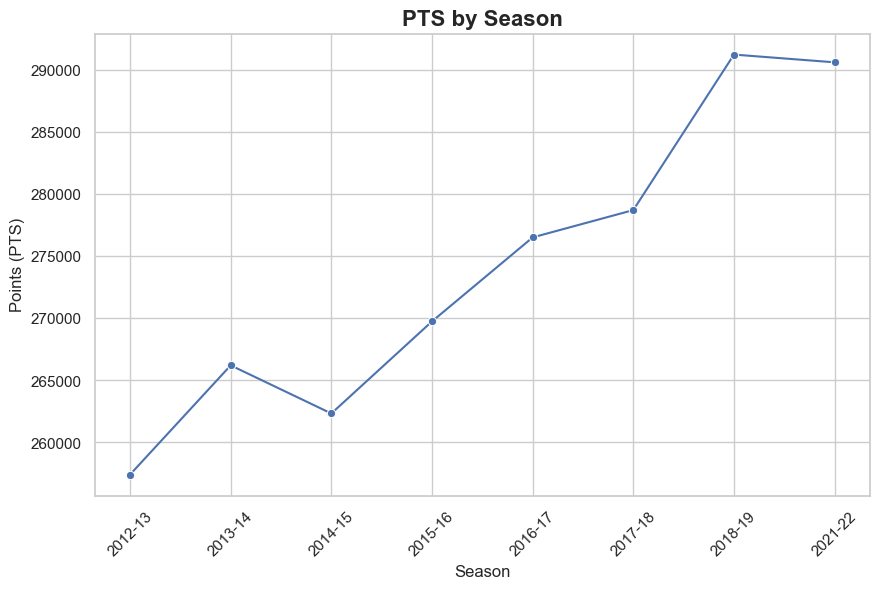

In [195]:
#Import seaborn
import seaborn as sns
sns.set_theme()

#Set Seaborn Style
sns.set(style='whitegrid')

#Plot PTS by season
plt.figure(figsize=(10,6))
sns.lineplot(x=stats_df['Year'], y=stats_df['PTS'], marker='o')
plt.xticks(stats_df['Year'], rotation=45)
plt.title('PTS by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Points (PTS)')
plt.show()

In [196]:
#Display max increase in pts and avg increase in pts 
pts_max_diff = np.nanmax(diff['PTS'])
pts_avg_increase = np.nanmean(diff['PTS'])
print('Maximum Increase: ' + str(pts_max_diff) + ' points, Average Increase: ' + str(pts_avg_increase) + ' points') 

Maximum Increase: 12527.0 points, Average Increase: 4744.0 points


### **Field Goals Made**
The graph below illustrates the number of field goals made (`FGM`) across various seasons. We can see a consistent increase in FGM over the seasons. The largest increase between two seasons was 3,645 field goals, with an average increase of approximately 1,333 field goals per season.

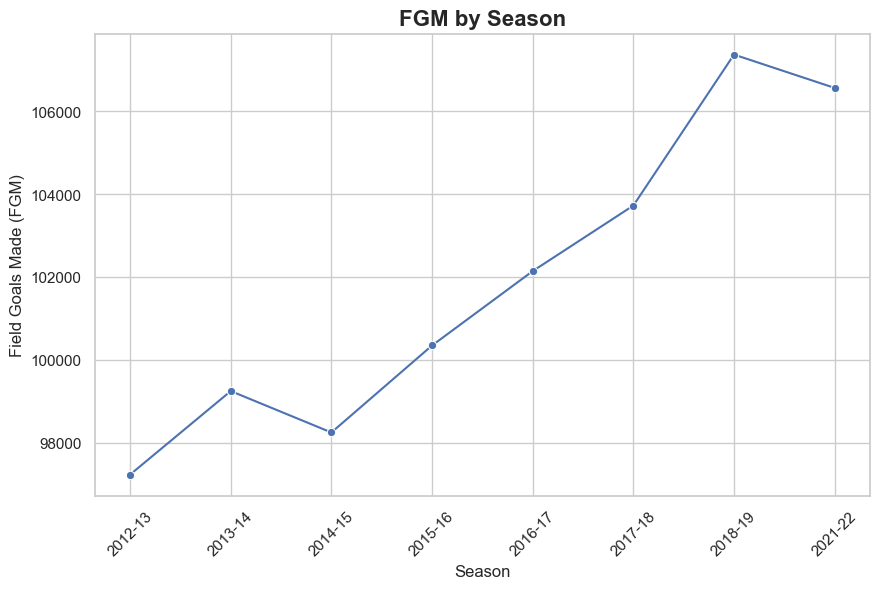

In [197]:
#Display FGM by season
plt.figure(figsize=(10,6))
sns.lineplot(x=stats_df['Year'], y=stats_df['FGM'], marker='o')
plt.xticks(stats_df['Year'], rotation=45)
plt.title('FGM by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Field Goals Made (FGM)')
plt.show()

In [198]:
#Display max increase in FGM and avg increase in FGM 
fgm_max_diff = np.nanmax(diff['FGM'])
fgm_avg_increase = np.nanmean(diff['FGM'])
print('Maximum Increase: ' + str(fgm_max_diff) + ' field goals, Average Increase: ' + str(fgm_avg_increase) + ' field goals') 

Maximum Increase: 3645.0 field goals, Average Increase: 1333.4285714285713 field goals


### **Three Pointers Made**
The graph below shows the number of three-pointers made (`FG3M`) across different seasons. The steady rise in 3PM suggests a growing reliance on three-point shots. The largest increase between two seasons was 2,916 three-pointers, with an average increase of nearly 1,989 three-pointers per season. This increase in three-point shooting may be a significant factor contributing to the overall rise in total points scored.

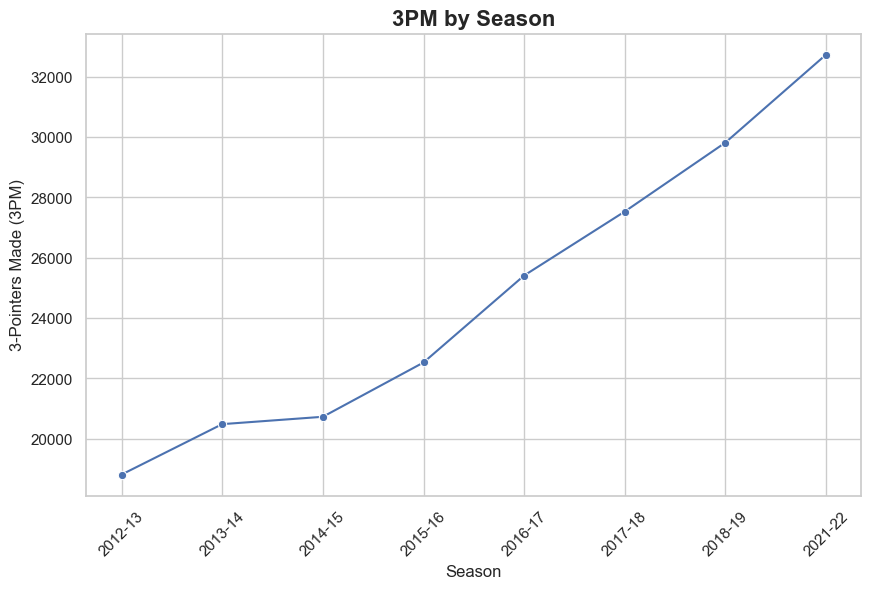

In [199]:
#Plot 3PM by season
plt.figure(figsize=(10,6))
sns.lineplot(x=stats_df['Year'], y=stats_df['FG3M'], marker='o')
plt.xticks(stats_df['Year'], rotation=45)
plt.title('3PM by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('3-Pointers Made (3PM)')
plt.show()

In [200]:
#Display max increase in 3PM and avg increase in 3PM
threes_max_diff = np.nanmax(diff['FG3M'])
threes_avg_increase = np.nanmean(diff['FG3M'])
print('Maximum Increase: ' + str(threes_max_diff) + ' 3 pointers made, Average Increase: ' + str(threes_avg_increase) + ' 3 pointers made') 

Maximum Increase: 2916.0 3 pointers made, Average Increase: 1989.2857142857142 3 pointers made


### **Three Pointers Attempted**
The graph depicting three-pointers attempted (`FG3A`) follows a similar upward trend, reinforcing the shift toward three-point shooting in recent seasons. The largest increase between two seasons was 8,409 attempts, with an average increase of approximately 5,712 attempts per season. The strong correlation between the rise in 3PA and 3PM underscores the growing importance of the three-point shot in today's game, likely driving the overall increase in scoring.

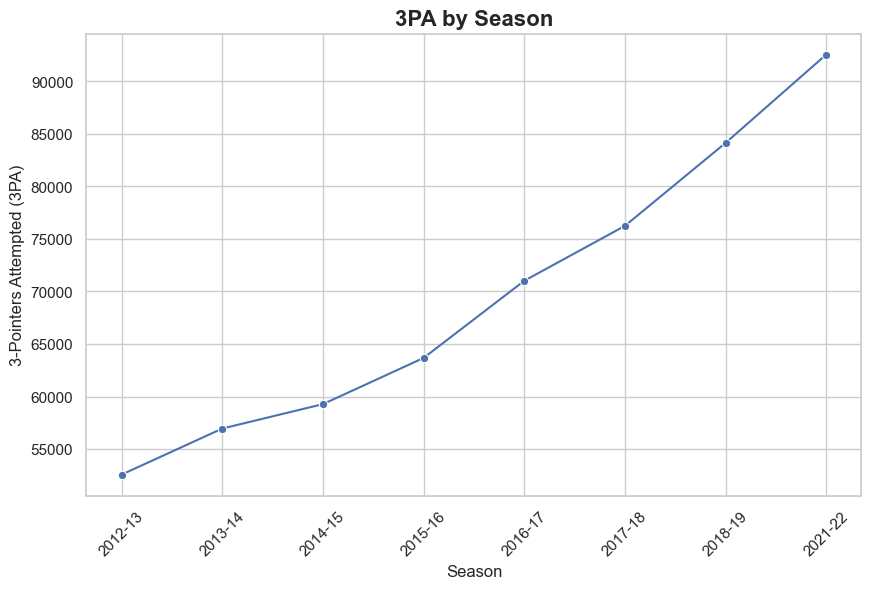

In [201]:
#Plot 3PA by season
plt.figure(figsize=(10,6))
sns.lineplot(x=stats_df['Year'], y=stats_df['FG3A'], marker='o')
plt.xticks(stats_df['Year'], rotation=45)
plt.title('3PA by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('3-Pointers Attempted (3PA)')
plt.show()

In [202]:
#Display max increase in 3PA and avg increase in 3PA
threes_attempted_max_diff = np.nanmax(diff['FG3A'])
threes_attempted_avg_increase = np.nanmean(diff['FG3A'])
print('Maximum Increase: ' + str(threes_attempted_max_diff) + ' 3s attempted, Average Increase: ' + str(threes_attempted_avg_increase) + ' 3s attempted') 

Maximum Increase: 8409.0 3s attempted, Average Increase: 5711.857142857143 3s attempted


### **Relationship Between `FG3M` and `FG3A`**
The scatter plot of `FG3M` vs. `FG3A` further demonstrates the strong positive correlation between the number of three-pointers attempted and those made. As teams increasingly rely on three-point shots, the data shows that a higher volume of attempts generally leads to more made three-pointers, which is a key driver of the rise in scoring across seasons.

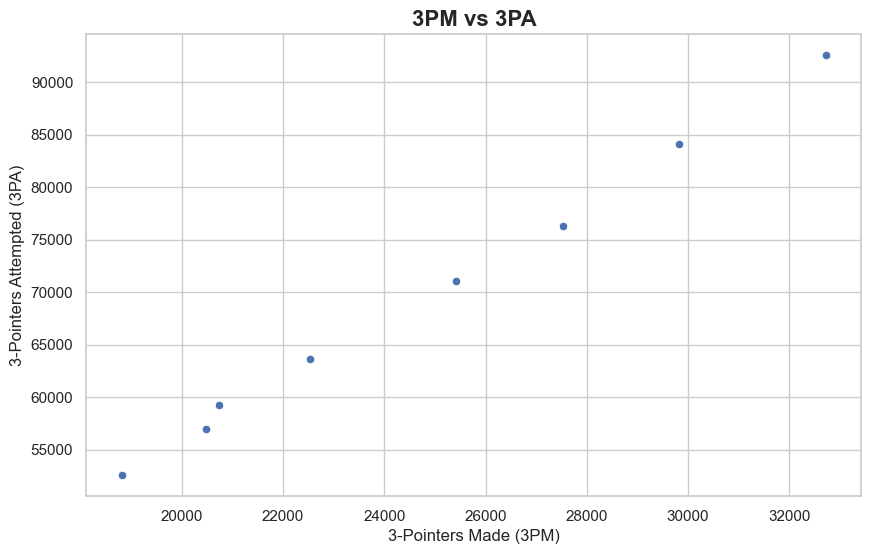

In [203]:
#Display scatter plot of 3PM vs 3PA
plt.figure(figsize=(10,6))
sns.scatterplot(x=stats_df['FG3M'], y=stats_df['FG3A'])
plt.title('3PM vs 3PA', fontsize=16, fontweight='bold')
plt.xlabel('3-Pointers Made (3PM)')
plt.ylabel('3-Pointers Attempted (3PA)')
plt.show()

### **Relationship Between Total Points (`PTS`) and `FG3M`**
Finally, the scatter plot of total points scored (`PTS`) versus three-pointers made (`FG3M`) shows a clear relationship between these two variables. As teams score more three-pointers, the overall points scored in a season tend to increase. This reinforces the idea that the rise in three-point shooting is a huge factor contributing to the overall increase in scoring across seasons.

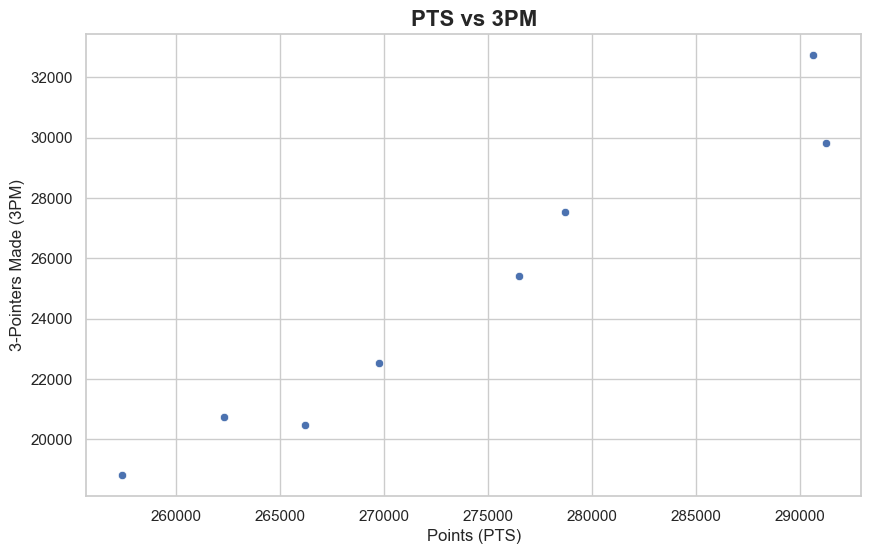

In [204]:
#Display scatter plot of PTS vs 3PM
plt.figure(figsize=(10,6))
sns.scatterplot(x=stats_df['PTS'], y=stats_df['FG3M'])
plt.title('PTS vs 3PM', fontsize=16, fontweight='bold')
plt.xlabel('Points (PTS)')
plt.ylabel('3-Pointers Made (3PM)')
plt.show()

### **Further Analysis: Three Point Percentage (`3P%`)**
The graph below of 3-point percentage (`3P%`) over the seasons shows some ups and downs instead of a steady increase. Even though teams are shooting more three-pointers and making more of them, their accuracy hasn't consistently improved. This means that while teams are taking more shots from beyond the arc, they aren't necessarily getting better at making them.

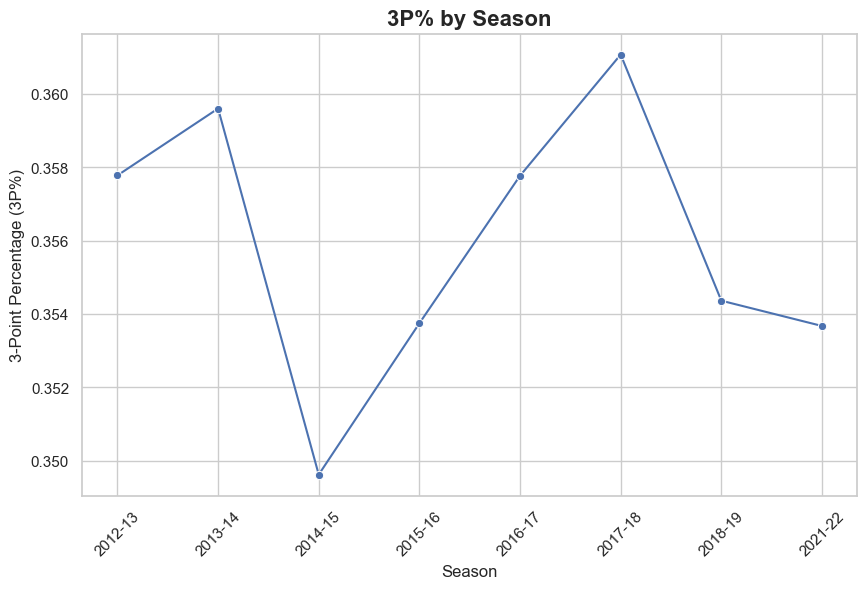

In [205]:
#Plot 3P% by season
plt.figure(figsize=(10,6))
sns.lineplot(x=stats_df['Year'], y=stats_df['3P%'], marker='o')
plt.xticks(stats_df['Year'], rotation=45)
plt.title('3P% by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('3-Point Percentage (3P%)')
plt.show()

The scatter plot below comparing 3-point percentage (`3P%`) with total points scored (`PTS`) shows that there isn't a strong relationship between the two. This indicates that the accuracy of three-point shooting hasn't been a key factor in the overall rise of points scored across seasons. Instead, the increase in total points seems to be driven more by the sheer volume of three-point attempts and makes, rather than improvements in shooting efficiency.

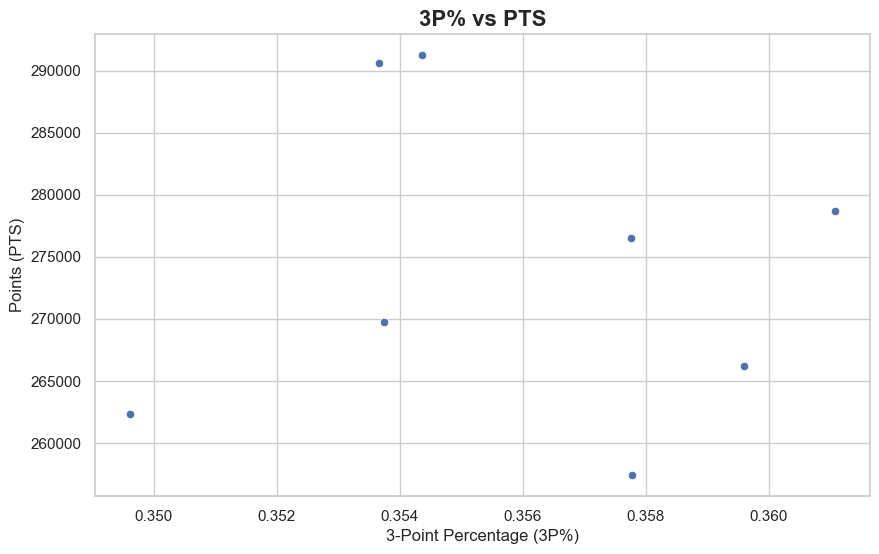

In [206]:
#Display scatter plot of 3P% vs PTS
plt.figure(figsize=(10,6))
sns.scatterplot(x=stats_df['3P%'], y=stats_df['PTS'])
plt.title('3P% vs PTS', fontsize=16, fontweight='bold')
plt.xlabel('3-Point Percentage (3P%)')
plt.ylabel('Points (PTS)')
plt.show()

## Conclusion
The data shows that the NBA’s offensive efficiency has been rapidly improving, but this improvement isn't primarily due to better shooting accuracy. Instead, the main driver is the significant increase in three-point attempts. Teams are taking far more shots from beyond the arc, which leads to more three-pointers being made, even if the shooting percentage hasn’t consistently improved. This strategic shift toward a higher volume of three-point shots is the key factor behind the rise in total points scored and the overall boost in offensive efficiency across the league.